In [ ]:
#분석에 필요한 모듈 설치
import pandas as pd
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/한국전자통신_en (1).csv")
docs = df[['독립항_en', 'text_en', '발명의 명칭']]
print(docs.shape)
print(docs.head(3))

#데이터 전처리 및 합치기
def preprocessing(text):
    if isinstance(text, float):
        text = str(text)
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['claim', 'non'])
    tokens = [item for item in tokens if item not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return ' '.join(lemmatized_tokens)

docs['독립항_en'] = docs['독립항_en'].apply(preprocessing)
docs['text_en'] = docs['text_en'].apply(preprocessing)
docs['발명의 명칭'] = docs['발명의 명칭'].apply(preprocessing)


combined_docs = docs['독립항_en'] + " " + docs['text_en'] + " " + docs['발명의 명칭']

(11, 3)
                                              독립항_en  \
0  [Claim 1]\nIn edge devices,\ncommunication cir...   
1  [Claim 1]\nAs a method of optimizing an artifi...   
2  [Claim 1]\nAn input unit that receives at leas...   

                                             text_en  \
0  An edge device according to an embodiment disc...   
1  An apparatus for automatically generating inst...   
2  The present invention relates to an artificial...   

                                              발명의 명칭  
0  에지 디바이스 및 인공지능 추론 방법(edge device and the metho...  
1  인공지능 프로세서를 위한 명령어 자동 생성 장치 및 그의 최적화 방법(apparat...  
2  인공지능 기반의 시스템 제어 장치 및 방법(apparatus and method f...  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-115-70a0c73d5f3c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs['독립항_en'] = docs['독립항_en'].apply(preprocessing)
<ipython-input-115-70a0c73d5f3c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
#벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features= 10000)

X = vectorizer.fit_transform(combined_docs)

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (11, 228)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# detokenized_doc = []
# for i in range(len(combined_docs)):
#     t = ' '.join(combined_docs[i])
#     detokenized_doc.append(t)

# combined_docs = detokenized_doc

#토큰화
tokenized_docs = combined_docs.apply(lambda x: word_tokenize(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]
print(corpus[1])

[(0, 2), (4, 14), (5, 6), (18, 3), (19, 5), (32, 2), (35, 9), (36, 3), (37, 14), (40, 6), (41, 3), (42, 3), (44, 4), (46, 8), (47, 12), (49, 17), (54, 2), (61, 1), (62, 2), (63, 3), (64, 1), (65, 1), (66, 11), (67, 1), (68, 1), (69, 3), (70, 1), (71, 15), (72, 3), (73, 3), (74, 1), (75, 1), (76, 1), (77, 6), (78, 3), (79, 6), (80, 3), (81, 2), (82, 12), (83, 10), (84, 9), (85, 4), (86, 14), (87, 8), (88, 4), (89, 2), (90, 1), (91, 1), (92, 1), (93, 3), (94, 1), (95, 2), (96, 15)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#토픽모델링에 필요한 모듈 설치
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


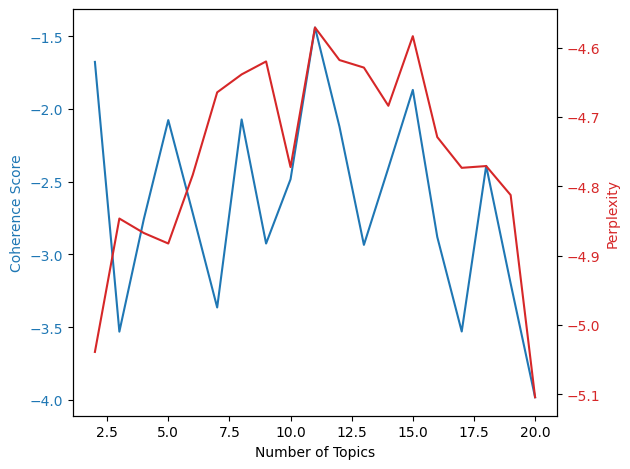

In [ ]:
#최적의 군집수 찾기
import matplotlib.pyplot as plt
coherence_scores = []
perplexity_scores = []
topic_nums = range(2, 21)

for num_topics in topic_nums:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary,
                         num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=10, passes=10, alpha='auto',
                         per_word_topics=True)

    # Perplexity 계산
    perplexity_scores.append(lda_model.log_perplexity(corpus))

    # Coherence 계산
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus,
                                         dictionary=dictionary, coherence='u_mass')
    coherence_scores.append(coherence_model_lda.get_coherence())

# Coherence와 Perplexity 시각화
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(topic_nums, coherence_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Perplexity', color=color)
ax2.plot(topic_nums, perplexity_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [1]:
#군집수 지정
import gensim
NUM_TOPICS = 11

In [2]:
#모델적용 및 토픽별 키워드출력
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS , id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

NameError: name 'corpus' is not defined

In [ ]:
print(ldamodel.print_topics())

[(0, '0.148*"system" + 0.099*"operate" + 0.061*"neuromorphic" + 0.061*"compute" + 0.050*"network" + 0.050*"neural" + 0.050*"model" + 0.039*"form" + 0.028*"components" + 0.022*"configure"'), (1, '0.038*"artificial" + 0.038*"intelligence" + 0.035*"perform" + 0.030*"cache" + 0.028*"processor" + 0.025*"condition" + 0.025*"value" + 0.023*"base" + 0.023*"model" + 0.023*"graph"'), (2, '0.065*"intelligence" + 0.065*"artificial" + 0.056*"data" + 0.049*"memory" + 0.045*"model" + 0.040*"learn" + 0.036*"base" + 0.029*"episodic" + 0.020*"store" + 0.020*"feature"'), (3, '0.004*"intelligence" + 0.004*"learn" + 0.004*"artificial" + 0.004*"data" + 0.004*"system" + 0.004*"model" + 0.004*"base" + 0.004*"memory" + 0.004*"store" + 0.004*"use"'), (4, '0.004*"data" + 0.004*"intelligence" + 0.004*"artificial" + 0.004*"sensor" + 0.004*"device" + 0.004*"base" + 0.004*"model" + 0.004*"surround" + 0.004*"learn" + 0.004*"edge"'), (5, '0.004*"cache" + 0.004*"memory" + 0.004*"map" + 0.004*"multiple" + 0.004*"process

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#토픽 시각화
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Word2Vec
#필요한 모듈 설치 및 모델적용
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=tokenized_docs, vector_size=1000, window=6,
                 min_count=6, workers=4, sg=0)
model.wv.most_similar("neuromorphic")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('data', 0.7612343430519104),
 ('neural', 0.7563580870628357),
 ('system', 0.7542058825492859),
 ('intelligence', 0.7451023459434509),
 ('include', 0.7430393695831299),
 ('artificial', 0.7348690032958984),
 ('model', 0.7220861911773682),
 ('base', 0.71853107213974),
 ('perform', 0.7131730914115906),
 ('store', 0.7087292671203613)]

In [ ]:
model_result = model.wv.most_similar("hardware")
model_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('intelligence', 0.7168165445327759),
 ('neural', 0.7041057348251343),
 ('artificial', 0.7023307681083679),
 ('system', 0.6887525916099548),
 ('data', 0.6857069134712219),
 ('base', 0.6750904321670532),
 ('include', 0.6707839965820312),
 ('sensor', 0.6691716313362122),
 ('model', 0.6683804988861084),
 ('store', 0.6602288484573364)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
